In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
from glob import glob

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
# from keras.utils.np_utils import to_categorical
from tensorflow.keras.utils import to_categorical # import to_categorical from the correct module.
 # convert to one-hot-encoding

from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras import Model
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras import backend as K
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
import tensorflow.keras as keras

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/Skin_Lesions_Classification_DCNNs-master/InceptionV3FT.keras')


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 192, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 95, 127, 32)          864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 95, 127, 32)          96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 95, 127, 32)          0         ['batch_normalization[0][0

In [ ]:

X_test = np.load("/content/drive/MyDrive/SURF_test_sets_final/inner+outer_ring_test_500.npy")
y_test = np.load("/content/drive/MyDrive/SURF_test_sets_final/inner+outer_ring_test_500_labels.npy")
y_test = to_categorical(y_test)
X_test.shape, y_test.shape


((500, 192, 256, 3), (500, 7))

In [ ]:
loss_val, acc_val = model.evaluate(X_test, y_test, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (acc_val, loss_val))

16/16 [==============================] - 4s 245ms/step - loss: 1.5503 - accuracy: 0.4780
Validation: accuracy = 0.478000  ;  loss_v = 1.550294


In [ ]:
from sklearn.metrics import classification_report

y_pred_prob = model.predict(X_test)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)

# Convert true labels to integer form if necessary
y_test_labels = np.argmax(y_test, axis=1)

# Generate the classification report
report = classification_report(y_test_labels, y_pred, output_dict=True)
print(report)

# Extract overall metrics
precision = report['macro avg']['precision']
recall = report['macro avg']['recall']
f1_score = report['macro avg']['f1-score']
print("Overall Precision: ", precision)
print("Overall Recall: ", recall)
print("Overall F1-Score: ", f1_score)

16/16 [==============================] - 3s 190ms/step
{'0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 15.0}, '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 21.0}, '2': {'precision': 0.125, 'recall': 0.017857142857142856, 'f1-score': 0.03125, 'support': 56.0}, '3': {'precision': 0.0196078431372549, 'recall': 0.14285714285714285, 'f1-score': 0.034482758620689655, 'support': 7.0}, '4': {'precision': 0.739413680781759, 'recall': 0.6637426900584795, 'f1-score': 0.6995377503852079, 'support': 342.0}, '5': {'precision': 0.0273972602739726, 'recall': 0.25, 'f1-score': 0.04938271604938271, 'support': 8.0}, '6': {'precision': 0.13114754098360656, 'recall': 0.1568627450980392, 'f1-score': 0.14285714285714285, 'support': 51.0}, 'accuracy': 0.478, 'macro avg': {'precision': 0.14893804645379902, 'recall': 0.1759028172672578, 'f1-score': 0.13678719541606044, 'support': 500.0}, 'weighted avg': {'precision': 0.5338488728033561, 'recall': 0.478, 'f1-score': 0.497

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


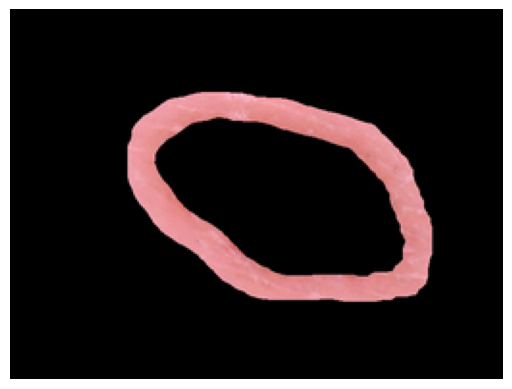

In [ ]:
data = np.load('/content/drive/MyDrive/SURF_test_sets_final/inner+outer_ring_test_500.npy')
plt.imshow(data[0])
plt.axis('off')
plt.show()

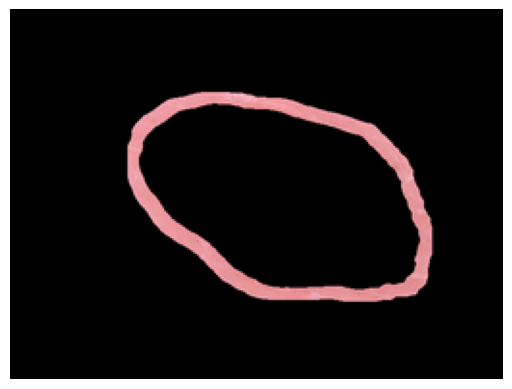

In [ ]:
data = np.load('/content/drive/MyDrive/SURF_test_sets_final/outer_ring_test_500.npy')
plt.imshow(data[0])
plt.axis('off')
plt.show()


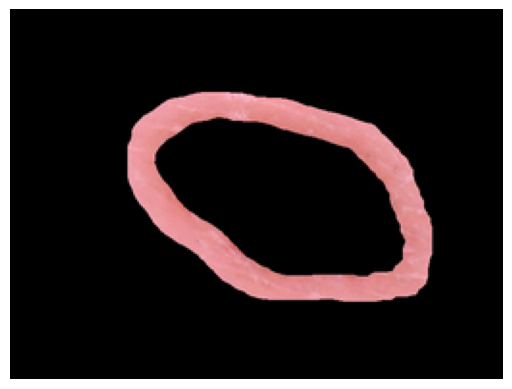

In [ ]:
data = np.load('/content/drive/MyDrive/SURF_test_sets_final/inner+outer_ring_test_500.npy')
plt.imshow(data[0])
plt.axis('off')
plt.show()
